## Proyecto Final

### 1. Contexto del Problema
En la distribución de energía eléctrica, especialmente en países en desarrollo, un problema común y crítico es la vulneración de los sistemas mediante los cuales las empresas prestadoras de servicio suministran energía a los usuarios. Esta vulneración incluye manipulaciones a las herramientas usadas por las empresas para alterar la tarifa cobrada, lo que resulta en pérdidas económicas significativas y riesgos operativos. Identificar y mitigar estas manipulaciones es vital para asegurar la eficiencia y sostenibilidad del suministro eléctrico.

#### Problema a Resolver
El problema específico que se desea abordar es la detección de fraude en el consumo de energía eléctrica. El fraude puede manifestarse de diversas formas, como la manipulación de medidores, conexiones ilegales, y alteración de datos de consumo. Estas actividades fraudulentas no solo afectan las finanzas de las empresas, sino que también pueden poner en riesgo la seguridad del suministro eléctrico.

#### Importancia y Utilidad del Problema
Detectar y prevenir el fraude en el consumo de energía eléctrica tiene múltiples beneficios:

Recuperación de Pérdidas Económicas: Las empresas pueden recuperar parte de los ingresos perdidos debido a fraudes.

Mejora de la Eficiencia Operativa: Identificar patrones de fraude permite a las empresas optimizar sus operaciones y enfocarse en áreas de alto riesgo.

Seguridad del Suministro: Reducir el fraude contribuye a la estabilidad y seguridad del suministro eléctrico.

Justicia y Equidad: Asegurar que todos los usuarios paguen lo justo por el consumo de energía promueve la equidad.

#### Ventajas de Usar Deep Learning
Las metodologías de Deep Learning ofrecen varias ventajas para resolver este problema:

Manejo de Grandes Cantidades de Datos: Las redes neuronales profundas pueden procesar y aprender de vastas cantidades de datos históricos y actuales.

Detección de Patrones Complejos: Pueden identificar patrones sutiles y no lineales en los datos que otras técnicas de machine learning podrían pasar por alto.

Adaptabilidad y Escalabilidad: Los modelos de Deep Learning pueden adaptarse y escalarse fácilmente a medida que se recopilan más datos.

Automatización: Permiten la automatización de la detección de fraude, reduciendo la necesidad de intervención manual y mejorando la eficiencia.

#### Formulación de la Pregunta de Interés
La pregunta de interés que guía este proyecto es:

¿Cómo podemos utilizar algoritmos de Deep Learning para detectar de manera eficiente y precisa el fraude en el consumo de energía eléctrica, aprovechando grandes volúmenes de datos históricos y actuales, y qué impacto tiene esta detección en la reducción de pérdidas económicas y mejora de la eficiencia operativa de la empresa?

Esta pregunta no solo busca desarrollar un modelo predictivo, sino también entender cómo la implementación de estas tecnologías puede transformar la gestión del suministro de energía eléctrica, mejorando la sostenibilidad y seguridad del sistema.

### 2. Exploración de los Datos
#### Contexto de los Datos
Los datos que se analizarán corresponden a la información técnica y comercial de una empresa prestadora del servicio de energía eléctrica en Centroamérica. Estos datos son fundamentales para modelar el comportamiento de los usuarios y detectar posibles fraudes en el consumo de energía. A continuación, se describen las dimensiones y el significado de las variables incluidas en el conjunto de datos. Los datos corresponden a una imagen de la información alojada en MySQL tomada el 25 de septiembre de 2023

#### Descripción de las Variables
Las variables incluidas en el conjunto de datos pueden agruparse en diferentes categorías según su naturaleza y su función en el modelo de detección de fraude.

Información Técnica:

ID de la Unidad de Consumo: Identificador único para cada unidad de consumo.
Clase de la Unidad: Categoría a la que pertenece la unidad de consumo (e.g., residencial, comercial, industrial).
Tipo de Medidor: Tipo de dispositivo utilizado para medir el consumo de energía.

Información de Consumo:

Consumo Diario: Cantidad de energía consumida diariamente.
Consumo Mensual: Suma del consumo diario para cada mes.
Promedio de Consumo: Promedio del consumo diario durante un periodo específico.
Desviación Estándar del Consumo: Medida de la variabilidad del consumo diario.

Información Comercial:

Tarifa Aplicada: Tarifa de energía eléctrica aplicada a la unidad de consumo.
Facturación Mensual: Monto total facturado mensualmente.

Cálculos Derivados:

Promedios, desviaciones, máximos, mínimos, etc, en diferentes ventanas de tiempo. Estas variables se basan principalmente eln la información histórica de las unidades de consumo.

In [33]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
# Desactivar todas las advertencias temporalmente
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

# Cargar el archivo CSV
datos = pd.read_csv('datos.csv', low_memory=False)

# Mostrar las primeras filas del conjunto de datos
print("Primeras filas del conjunto de datos:")
print(datos.head())

# Información general sobre el conjunto de datos
print("\nInformación general del conjunto de datos:")
print(datos.info())

Primeras filas del conjunto de datos:
   Unnamed: 0       ID_UC ID_OCORRENCIA  RESULTADO  N338  N342  N341  N340  \
0           0  9005721560    A-10003923         10   NaN   NaN   NaN   NaN   
1           1  9005781700    A-10004923         10   NaN   NaN   NaN   NaN   
2           2  3813704320    A-10005923         10   NaN   NaN   NaN   NaN   
3           3   401600580     A-1000831         10   NaN   NaN   NaN   NaN   
4           4   402400780     A-1000832         10   NaN   NaN   NaN   NaN   

   N339  N337  ...  ID_REGION  ID_UC_METER_TYPE  ID_UC_CLASS  \
0   NaN   NaN  ...         50               0.0            1   
1   NaN   NaN  ...         50               3.0            1   
2   NaN   NaN  ...         30               0.0            1   
3   NaN   NaN  ...         50               0.0            1   
4   NaN   NaN  ...         50               3.0            1   

   ID_UC_ACTIVITY_FIELD  ID_UC_CONNECTION_TYPE  ID_LOCALITY  \
0                   NaN                    Na

Con base en la información proporcionada, el conjunto de datos contiene 81,289 registros y 469 columnas. La mayoría de las columnas son de tipo float64 y int64, con solo 3 columnas de tipo object. Esto indica que los datos son predominantemente numéricos, lo que es adecuado para el análisis estadístico y la modelación con redes neuronales.

In [34]:
# Analizar las columnas de tipo object
object_columns = datos.select_dtypes(include=['object']).columns
print(f"\nColumnas de tipo 'object': {object_columns}")

# Mostrar los valores únicos en las columnas de tipo object para entender su contenido
for col in object_columns:
    print(f"\nValores únicos en la columna '{col}':")
    print(datos[col].unique())


Columnas de tipo 'object': Index(['ID_OCORRENCIA', 'ID_UC_CONNECTION_TYPE', 'UC_COL_ID_05'], dtype='object')

Valores únicos en la columna 'ID_OCORRENCIA':
['A-10003923' 'A-10004923' 'A-10005923' ... 'F-998' 'F-999'
 'ID_UCDSCSDCSDCSDCSDCSD']

Valores únicos en la columna 'ID_UC_CONNECTION_TYPE':
[nan 'TRIFILAR' 'DELTA' 'NETWORK' 'MONOFASICO' 'ESTRELLA']

Valores únicos en la columna 'UC_COL_ID_05':
['TR' 'TG' 'TIN' 'TRH' 'CS' 'MC' 'TPROM' 'TMT' 'TMTB']


La columna ID_OCORRENCIA corresponde a códigos internos que no aportan valor al análisis y modelado, es adecuado eliminarla. 

In [35]:
# Eliminar la columna ID_OCORRENCIA
datos = datos.drop(columns=['ID_OCORRENCIA'])

Columnas como ID_UC_CONNECTION_TYPE y UC_COL_ID_05, que tienen un número limitado de valores únicos y representan categorías naturales, son buenas candidatas para convertir a category.

In [36]:
# Convertir columnas de tipo object a categorías
# Columnas categóricas identificadas
categorical_columns = ['ID_UC_CONNECTION_TYPE', 'UC_COL_ID_05']
for col in categorical_columns:
    datos[col] = datos[col].astype('category')

In [37]:
def mapeo_de_variables(df : pd.DataFrame) -> pd.DataFrame:
    """genera una tabla donde muestra, para cada variable en un dataframe, su número de nulos, tipo, valores únicos y porcentaje de nulos"""
    dimension=df.shape
    variables = df.columns.to_list()
    nulos = []
    variable = []
    tipo_variable = []
    valores_unicos = []
    unicos = []
    for variable in variables:
        nulos.append(df[variable].isnull().sum())
        tipo_variable.append(df[variable].dtype)
        valores_unicos.append(len(df[variable].dropna().unique()))
        unicos.append(df[variable].dropna().unique().tolist())
    tabla = pd.DataFrame({"Variable":variables,"Nulos":nulos,"Tipo Variable":tipo_variable,"Valores Unicos": valores_unicos,"Unicos":unicos})
    tabla["Porcentaje Nulos"]=(tabla["Nulos"]/len(df))*100
    tabla.sort_values("Porcentaje Nulos",ascending=False, inplace = True)
    return tabla


In [38]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(mapeo_de_variables(datos))

                  Variable  Nulos Tipo Variable  Valores Unicos  \
257                   N269  81289       float64               0   
432                   N192  81289       float64               0   
278                   N156  81289       float64               0   
258                   N268  81289       float64               0   
454                   N302  81289       float64               0   
304                   N406  81289       float64               0   
255                   N277  81289       float64               0   
418                   N246  81289       float64               0   
192                   N271  81289       float64               0   
453                   N301  81288       float64               1   
452                   N303  81288       float64               1   
291                   N336  81281       float64               2   
292                   N335  81280       float64               1   
293                   N334  81272       float64               

Identificar y Eliminar Variables con Más del 40% de Valores Nulos y Valores Únicos
* Identificar las columnas con más del 40% de valores nulos.
* Identificar las columnas con valores únicos.
* Eliminar estas columnas del conjunto de datos.

In [39]:
# Calcular el porcentaje de valores nulos en cada columna
nulos_unicos = datos.isnull().sum().to_frame(name='Nulos').join(datos.nunique().to_frame(name='Valores Unicos')).reset_index()
nulos_unicos.columns = ['Variable', 'Nulos', 'Valores Unicos']
nulos_unicos['Porcentaje Nulos'] = (nulos_unicos['Nulos'] / len(datos)) * 100

# Identificar columnas con más del 40% de valores nulos
columnas_mas_40_nulos = nulos_unicos[nulos_unicos['Porcentaje Nulos'] > 40]['Variable']
print(f"Columnas con más del 40% de valores nulos:\n{columnas_mas_40_nulos}")

# Identificar columnas con un solo valor único
columnas_valor_unico = nulos_unicos[nulos_unicos['Valores Unicos'] == 1]['Variable']
print(f"Columnas con valores únicos:\n{columnas_valor_unico}")

# Combinar las columnas a eliminar
columnas_a_eliminar = pd.concat([columnas_mas_40_nulos, columnas_valor_unico]).unique()
print(f"Columnas a eliminar:\n{columnas_a_eliminar}")

# Eliminar las columnas del DataFrame
datos_filtrados = datos.drop(columns=columnas_a_eliminar)

# Mostrar las primeras filas del DataFrame filtrado
print("\nPrimeras filas del conjunto de datos después de eliminar columnas:")
print(datos_filtrados.head())

# Información general sobre el conjunto de datos filtrado
print("\nInformación general del conjunto de datos filtrado:")
print(datos_filtrados.info())


Columnas con más del 40% de valores nulos:
3                       N338
4                       N342
5                       N341
6                       N340
7                       N339
               ...          
454                     N302
455                     N166
456                     N167
461     ID_UC_ACTIVITY_FIELD
462    ID_UC_CONNECTION_TYPE
Name: Variable, Length: 115, dtype: object
Columnas con valores únicos:
3      N338
4      N342
5      N341
6      N340
7      N339
8      N337
9      N276
12     N625
13     N624
14     N623
15     N622
16     N620
17     N621
292    N335
296    N405
322    N328
324    N403
345    N367
348    N508
349    N526
350    N518
351    N510
361    N343
365    N218
366    N219
369    N220
370    N215
372    N239
373    N217
374    N214
393    N126
400    N204
452    N303
453    N301
Name: Variable, dtype: object
Columnas a eliminar:
['N338' 'N342' 'N341' 'N340' 'N339' 'N337' 'N276' 'N625' 'N624' 'N623'
 'N664' 'N643' 'N641' 'N639' 'N596' 

Para garantizar que el conjunto de datos sea manejable y útil para el análisis, es importante filtrar las columnas irrelevantes, como las que contienen grandes cantidades de valores nulos o valores únicos.

Hemos eliminado con éxito las columnas que tenían más del 40% de valores nulos y las que contenían valores únicos, resultando en un conjunto de datos con 332 columnas.

Las siguientes columnas se eliminan por no tener información relevante para el análisis:

Unnamed: 0, se elimina porque corresponde al número de la observación y la indexación cumple esa función

ID_UC, se elimina la unidad de consumo porque no es relevante

ENERGIA_A_INCREMENTAR, se elimina ya que su valor depende de la variable ENERGIA_A_RECUPERAR


In [40]:
columnas_a_borrar = ["Unnamed: 0", "ID_UC", "ENERGIA_A_INCREMENTAR"]
datos_filtrados = datos_filtrados.drop(columnas_a_borrar, axis=1)
datos_filtrados.head()

,RESULTADO,N404,N534,N402,N435,N436,N665,N637,N635,N633,...,N257,ID_UC_PHASE,ID_REGION,ID_UC_METER_TYPE,ID_UC_CLASS,ID_LOCALITY,ID_UC_READING_CYCLE,ID_MUNICIPALITY,UC_COL_ID_05,UC_COL_ID_03
0,10,0,0,0,NaN,NaN,120.0,NaN,NaN,NaN,...,0.0,4.0,50,0.0,1,1,5026.0,101,TR,90
1,10,0,0,0,NaN,NaN,234.0,NaN,NaN,NaN,...,0.0,4.0,50,3.0,1,1,NaN,101,TR,90
2,10,1,1,0,NaN,NaN,381.0,NaN,NaN,NaN,...,0.0,2.0,30,0.0,1,1,3014.0,102,TR,38
3,10,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,50,0.0,1,1,5030.0,101,TR,4
4,10,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,50,3.0,1,1,5030.0,101,TR,4


De antemano se posee información de que las variables 'ID_UC_PHASE', 'ID_REGION', 'ID_UC_METER_TYPE', 'ID_UC_CLASS', 'ID_LOCALITY', 'ID_UC_READING_CYCLE', 'ID_MUNICIPALITY', 'UC_COL_ID_03' son categóricas que corresponden a propiedades de las unidades de consumo. Para manejar adecuadamente las variables categóricas que están codificadas como numéricas, debes convertirlas al tipo category. Esto permitirá que los modelos de machine learning las traten como categorías en lugar de valores numéricos continuos.

In [41]:
# Listado de columnas categóricas codificadas como numéricas
categorical_columns = ['ID_UC_PHASE', 'ID_REGION', 'ID_UC_METER_TYPE', 'ID_UC_CLASS', 'ID_LOCALITY', 'ID_UC_READING_CYCLE', 'ID_MUNICIPALITY', 'UC_COL_ID_03']

# Convertir las columnas especificadas a tipo 'category'
for col in categorical_columns:
    datos_filtrados[col] = datos_filtrados[col].astype('category')

# Verificar la conversión
print("\nInformación general después de la conversión de columnas categóricas:")
print(datos_filtrados.info())


Información general después de la conversión de columnas categóricas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81289 entries, 0 to 81288
Columns: 329 entries, RESULTADO to UC_COL_ID_03
dtypes: category(9), float64(201), int64(119)
memory usage: 199.2 MB
None


In [45]:
# Analizar las columnas de tipo object
categorical_columns = datos_filtrados.select_dtypes(include=['category']).columns
print(f"\nColumnas de tipo 'object': {categorical_columns}")


Columnas de tipo 'object': Index(['ID_UC_PHASE', 'ID_REGION', 'ID_UC_METER_TYPE', 'ID_UC_CLASS',
       'ID_LOCALITY', 'ID_UC_READING_CYCLE', 'ID_MUNICIPALITY', 'UC_COL_ID_05',
       'UC_COL_ID_03'],
      dtype='object')


#### Imputación de Valores Nulos
Imputación de valores nulos en variables numéricas con la media.

Imputación de valores nulos en variables categóricas con la moda.

In [47]:
# Imputación de valores nulos en variables numéricas con la media
numerical_columns = datos_filtrados.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    mean_value = datos_filtrados[col].mean()
    datos_filtrados[col].fillna(mean_value, inplace=True)

# Imputación de valores nulos en variables categóricas con la moda
for col in categorical_columns:
    mode_value = datos_filtrados[col].mode()[0]
    datos_filtrados[col].fillna(mode_value, inplace=True)

# Verificar que no quedan valores nulos
print("\nVerificación de valores nulos después de la imputación:")
print(datos_filtrados.isnull().sum().sum())



Verificación de valores nulos después de la imputación:
0


Para identificar y eliminar las variables numéricas que están altamente correlacionadas:

* Calcular la matriz de correlación de las variables numéricas.
* Identificar pares de variables con alta correlación (por ejemplo, coeficiente de correlación mayor a 0.9).
* Eliminar una de las variables en cada par altamente correlacionado.

In [49]:
# Calcular la matriz de correlación para las variables numéricas
correlation_matrix = datos_filtrados[numerical_columns].corr().abs()

# Mostrar la matriz de correlación
correlation_matrix.head()

,RESULTADO,N404,N534,N402,N435,N436,N665,N637,N635,N633,...,N194,N159,N189,N207,N158,N195,N206,N161,N162,N257
RESULTADO,1.000000,0.012252,0.012252,0.020227,0.027709,0.029443,0.031706,0.034045,0.034226,0.033452,...,0.034134,0.056940,0.034357,0.033528,0.091499,0.034535,0.031297,0.034721,0.032782,0.052155
N404,0.012252,1.000000,1.000000,0.052708,0.007567,0.008971,0.008272,0.009207,0.009311,0.008522,...,0.009566,0.016941,0.007728,0.009408,0.008322,0.007425,0.009300,0.009651,0.009557,0.004649
N534,0.012252,1.000000,1.000000,0.052708,0.007567,0.008971,0.008272,0.009207,0.009311,0.008522,...,0.009566,0.016941,0.007728,0.009408,0.008322,0.007425,0.009300,0.009651,0.009557,0.004649
N402,0.020227,0.052708,0.052708,1.000000,0.000959,0.004720,0.000005,0.014787,0.003309,0.003443,...,0.003336,0.008974,0.002072,0.004693,0.015755,0.003114,0.006329,0.003357,0.006488,0.003820
N435,0.027709,0.007567,0.007567,0.000959,1.000000,0.914820,0.796410,0.841923,0.843146,0.861546,...,0.874730,0.004984,0.848315,0.882685,0.009861,0.884610,0.850117,0.870348,0.748961,0.007337


In [50]:
# Seleccionar las parejas de variables con correlación mayor a 0.9
high_corr_var = np.where(correlation_matrix > 0.9)
high_corr_var = [(correlation_matrix.index[x], correlation_matrix.columns[y]) 
                 for x, y in zip(*high_corr_var) if x != y and x < y]

# Mostrar las parejas de variables altamente correlacionadas
print("Pares de variables altamente correlacionadas (> 0.9):")
print(high_corr_var)

Pares de variables altamente correlacionadas (> 0.9):
[('N404', 'N534'), ('N435', 'N436'), ('N435', 'N567'), ('N435', 'N569'), ('N435', 'N441'), ('N435', 'N551'), ('N435', 'N553'), ('N435', 'N437'), ('N435', 'N583'), ('N435', 'N573'), ('N435', 'N422'), ('N435', 'N275'), ('N435', 'N577'), ('N435', 'N560'), ('N435', 'N561'), ('N435', 'N555'), ('N435', 'N423'), ('N435', 'N424'), ('N435', 'N407'), ('N435', 'N263'), ('N435', 'N258'), ('N435', 'N174'), ('N435', 'N181'), ('N435', 'N164'), ('N435', 'N165'), ('N435', 'N176'), ('N436', 'N637'), ('N436', 'N635'), ('N436', 'N579'), ('N436', 'N567'), ('N436', 'N547'), ('N436', 'N349'), ('N436', 'N358'), ('N436', 'N441'), ('N436', 'N656'), ('N436', 'N540'), ('N436', 'N532'), ('N436', 'N538'), ('N436', 'N542'), ('N436', 'N636'), ('N436', 'N634'), ('N436', 'N610'), ('N436', 'N583'), ('N436', 'N573'), ('N436', 'N477'), ('N436', 'N476'), ('N436', 'N475'), ('N436', 'N474'), ('N436', 'N473'), ('N436', 'N472'), ('N436', 'N471'), ('N436', 'N470'), ('N436', 

In [51]:
# Crear un conjunto para almacenar los nombres de las columnas a eliminar
columns_to_drop = set()

# Agregar la primera variable de cada par altamente correlacionado a columns_to_drop
for var1, var2 in high_corr_var:
    columns_to_drop.add(var1)

# Eliminar las columnas altamente correlacionadas
datos_filtrados.drop(columns=columns_to_drop, inplace=True)

# Mostrar información sobre el conjunto de datos después de eliminar columnas
print("\nInformación del conjunto de datos después de eliminar variables altamente correlacionadas:")
print(datos_filtrados.info())


Información del conjunto de datos después de eliminar variables altamente correlacionadas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81289 entries, 0 to 81288
Columns: 109 entries, RESULTADO to UC_COL_ID_03
dtypes: category(9), float64(17), int64(83)
memory usage: 62.8 MB
None


El conjunto de datos ahora tiene 109 columnas después de eliminar las variables altamente correlacionadas. Esto debería hacer que el conjunto de datos sea más manejable y mejorar el rendimiento de los modelos de machine learning.

Ahora podemos proceder con la exploración de los datos para comprender mejor su estructura y significado. Vamos a visualizar las distribuciones de las variables categóricas y numéricas restantes.

#### Exploración de Variables Categóricas

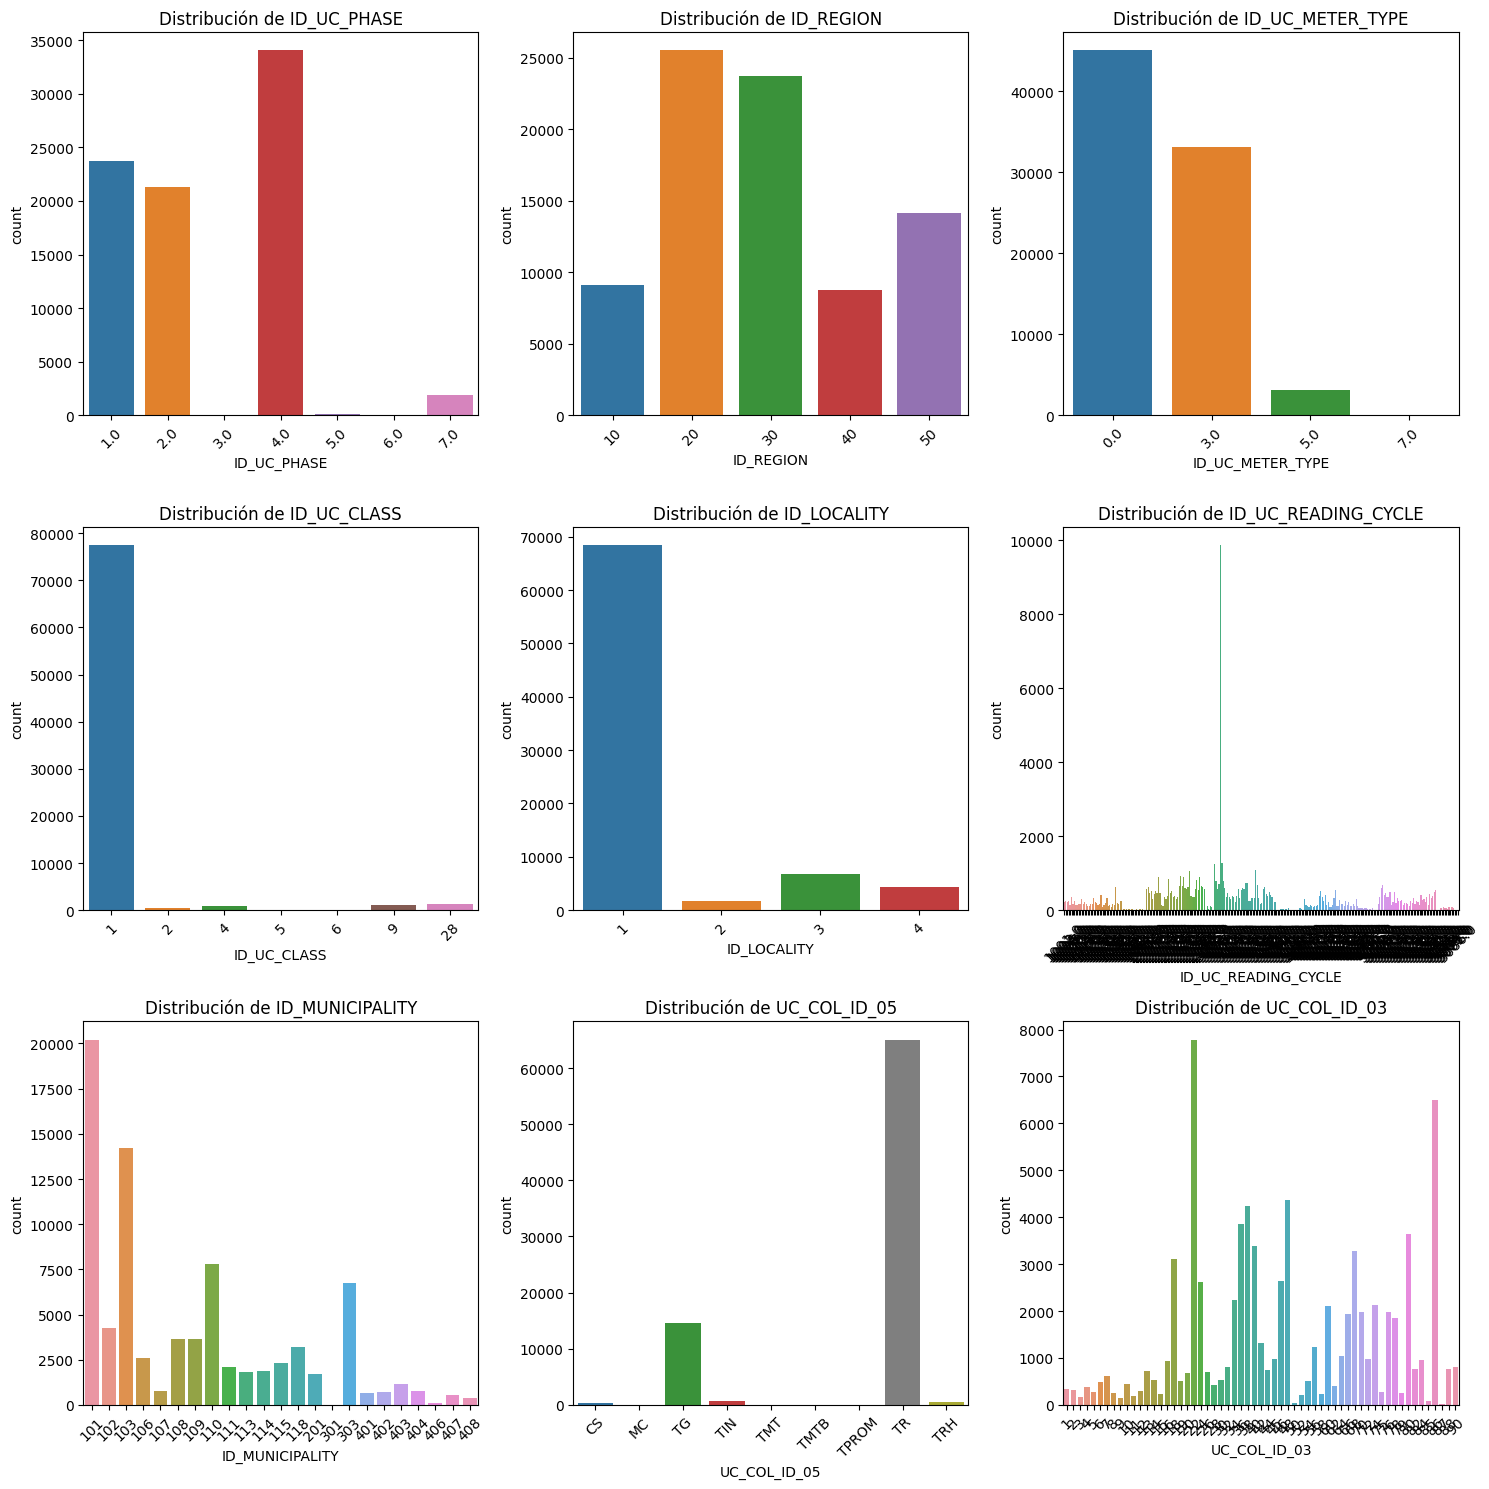

In [55]:
# Visualizar la distribución de las variables categóricas en grupos de tres
import math

# Definir el número de columnas por fila
cols_per_row = 3

# Calcular el número de filas necesarias
num_plots = len(categorical_columns)
num_rows = math.ceil(num_plots / cols_per_row)

# Crear las subplots
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(cols_per_row * 5, num_rows * 5))

# Aplanar la matriz de ejes para facilitar el acceso
axes = axes.flatten()

# Iterar sobre las columnas categóricas y los ejes para crear los gráficos
for i, col in enumerate(categorical_columns):
    sns.countplot(data=datos_filtrados, x=col, ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Eliminar ejes vacíos
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

#### Exploración de Variables Numéricas

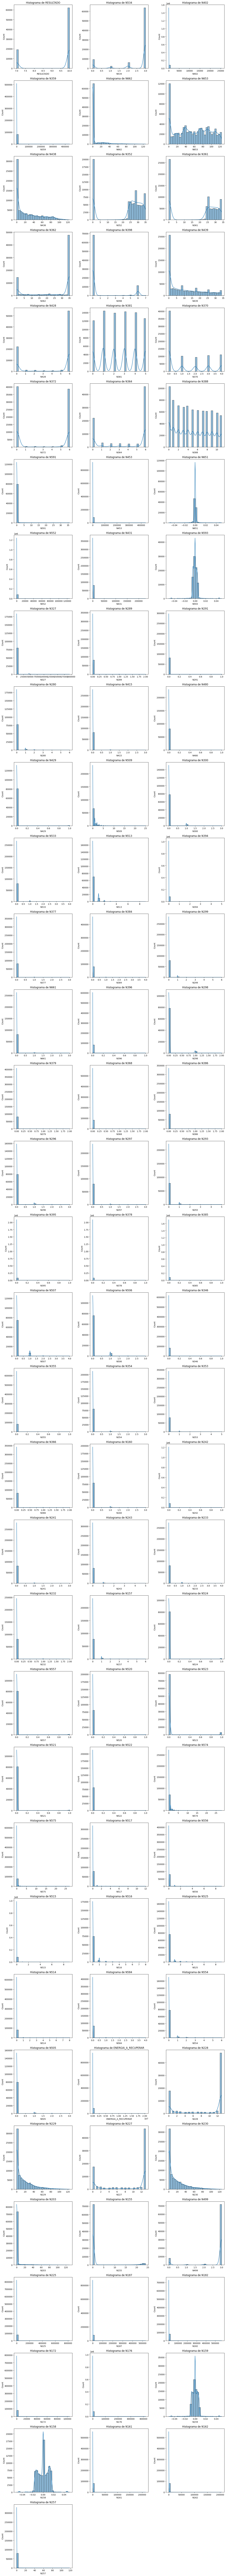

In [57]:
import warnings

# Suprimir las advertencias de tipo FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Visualizar histogramas para las variables numéricas en grupos de tres
num_plots = len(numerical_columns)
num_rows = math.ceil(num_plots / cols_per_row)

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(cols_per_row * 5, num_rows * 5))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.histplot(datos_filtrados[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Histograma de {col}')

# Eliminar ejes vacíos
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Los valores de la columna RESULTADO corresponden a 10 cuando la inspección a la instalación se determina normal y 7 cuando la inspección arroja un fraude, que son las instalaciones que nos interesa perfilar. Se mapearan a 0 y 1 para una más fácil comprensión.

In [162]:
# Mapeo de la variable RESULTADO
df = datos_filtrados.copy()  # Renombrar el DataFrame a df

# Mapeo de valores: 10 -> 0 y 7 -> 1
df['RESULTADO'] = df['RESULTADO'].map({10: 0, 7: 1})

# Verificación del mapeo
print(df['RESULTADO'].value_counts())

RESULTADO
0    62097
1    19192
Name: count, dtype: int64


#### Gráfica descriptiva de la etiqueta

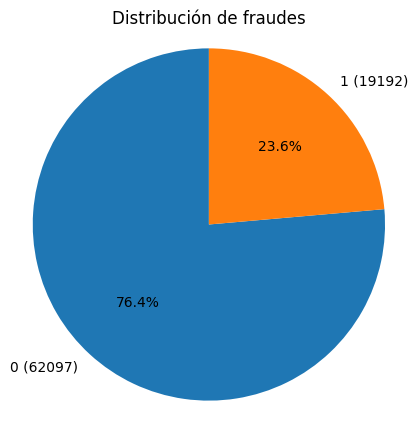

In [163]:
# Contar los valores únicos en la columna 'Resultado'
conteo_resultados = df['RESULTADO'].value_counts()

# Crear un gráfico de torta con los valores agregados a las etiquetas
plt.figure(figsize=(5, 5))
plt.pie(conteo_resultados, labels=[f'{label} ({count})' for label, count in conteo_resultados.items()], autopct='%1.1f%%', startangle=90)
plt.title('Distribución de fraudes')
plt.axis('equal')  # Para que el gráfico sea un círculo en lugar de una elipse

# Mostrar el gráfico de torta
plt.show()

In [164]:
df.describe()

,RESULTADO,N534,N402,N359,N662,N653,N438,N352,N361,N362,...,N225,N187,N182,N172,N176,N159,N158,N161,N162,N257
count,81289.000000,81289.000000,81289.000000,81289.000000,81289.000000,81289.000000,81289.000000,81289.000000,81289.000000,81289.000000,...,81289.000000,81289.000000,81289.000000,81289.000000,81289.000000,81289.000000,81289.000000,81289.000000,81289.000000,81289.000000
mean,0.236096,2.527292,6.208085,864.314181,6.736668,56.324570,25.730861,21.870770,19.332948,24.568293,...,1126.787597,678.292375,818.312279,140.318689,463.372807,-0.000222,0.000310,473.657770,452.836075,0.395496
std,0.424684,0.994880,171.884711,3831.751762,16.894851,38.195007,29.652288,12.899735,13.722269,14.298211,...,7217.997218,4009.294419,5092.451377,792.465347,2465.309418,0.006295,0.010348,2273.975125,2021.377189,3.423113
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,-2.333333,-0.050508,-0.050508,5.000000,3.000000,0.000000
25%,0.000000,3.000000,0.000000,276.000000,0.000000,22.000000,0.000000,19.000000,0.000000,10.000000,...,278.000000,190.000000,224.000000,31.362234,117.857143,-0.003935,-0.007628,125.500000,119.000000,0.000000
50%,0.000000,3.000000,0.000000,558.000000,0.000000,57.000000,13.000000,27.000000,26.000000,35.000000,...,431.000000,311.000000,391.000000,73.257974,240.428571,-0.000222,0.000310,221.416667,222.333333,0.000000
75%,0.000000,3.000000,0.000000,864.314181,0.000000,89.000000,45.000000,31.000000,30.000000,35.000000,...,962.000000,637.000000,818.312279,140.318689,463.372807,0.003453,0.008598,456.333333,452.836075,0.000000
max,1.000000,3.000000,25500.000000,436920.000000,126.000000,124.000000,124.000000,35.000000,34.000000,35.000000,...,822776.000000,530437.000000,568514.000000,104394.497562,418059.857143,0.050508,0.050508,213879.000000,205766.666667,118.000000


In [170]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81289 entries, 0 to 81288
Columns: 109 entries, RESULTADO to UC_COL_ID_03
dtypes: category(9), float64(17), int64(83)
memory usage: 62.8 MB
None


In [165]:
#Tamaño del dataset
print(f"Número de observaciones en la base de datos: {df.shape[0]}")
print(f"Número de columnas en la base de datos: {df.shape[1]}")

Número de observaciones en la base de datos: 81289
Número de columnas en la base de datos: 109


### Preparación de los datos
Para preparar los datos de acuerdo con lo que se ha visto en el curso de Deep Learning, vamos a seguir un flujo de trabajo de preprocesamiento de datos que incluye varias técnicas fundamentales:

1. Codificación de Variables Categóricas
Utilizaremos codificación one-hot para las variables categóricas.

2. Escalado de Variables Numéricas
Aplicaremos la normalización o estandarización a las variables numéricas. este paso variará según el modelo.

3. División de los Datos en Conjuntos de Entrenamiento y Prueba
Dividiremos los datos en conjuntos de entrenamiento y prueba. Para asegurarnos de que la división de los datos en conjuntos de entrenamiento y prueba sea estratificada, de manera que se mantenga la misma proporción de la clase objetivo en ambos conjuntos, podemos utilizar el parámetro stratify en la función train_test_split de sklearn.

4. Preparación para el Modelo de Deep Learning
Convertiremos los datos a un formato adecuado para TensorFlow/Keras.

In [148]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
from imblearn.over_sampling import SMOTE

# Paso 1: Codificación de Variables Categóricas
categorical_columns = df.select_dtypes(include=['category']).columns
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_categorical_data = encoder.fit_transform(df[categorical_columns])
encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=encoder.get_feature_names_out(categorical_columns))
df = pd.concat([df.drop(columns=categorical_columns), encoded_categorical_df], axis=1)

# Paso 2: División de los Datos en Conjuntos de Entrenamiento y Prueba de manera estratificada (sin escalado inicial)
X = df.drop(columns=['RESULTADO'])
y = df['RESULTADO']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


### 4. Análisis Preliminar de Selección de Modelos Relevantes para Responder a la Pregunta
#### Problema Predictivo Planteado
El problema planteado es la detección de fraudes en el consumo de energía eléctrica utilizando datos históricos y técnicos proporcionados por una empresa de servicios eléctricos en Centroamérica. Este problema se puede abordar como un problema de clasificación binaria, donde el objetivo es clasificar los casos en "fraude" (1) o "no fraude" (0).

#### Modelos y Algoritmos de Deep Learning Relevantes
1. Redes Neuronales Profundas (DNN - Deep Neural Networks)

Descripción: Las redes neuronales profundas consisten en múltiples capas ocultas entre la capa de entrada y la capa de salida. Cada capa tiene un número de neuronas que aplican una función de activación no lineal a la combinación lineal de las entradas.

Justificación: Las DNN son adecuadas para capturar patrones complejos en los datos. La versatilidad y capacidad de modelado de relaciones no lineales las hace ideales para problemas de detección de fraudes, donde las características pueden tener relaciones intrincadas.

2. Redes Neuronales Convolucionales (CNN - Convolutional Neural Networks)

Descripción: Las CNN son una clase de redes neuronales que utilizan operaciones de convolución y son especialmente eficaces para el procesamiento de datos con estructura espacial o temporal.

Justificación: Aunque las CNN son predominantemente utilizadas en visión por computadora, pueden ser útiles en el análisis de series temporales o datos que presentan patrones locales repetitivos. Sin embargo, dado el contexto del problema actual, las CNN podrían ser menos relevantes a menos que se usen características derivadas que capturen patrones temporales en el consumo de energía.

3. Redes Neuronales Recurrentes (RNN - Recurrent Neural Networks) y LSTM (Long Short-Term Memory)

Descripción: Las RNN son redes neuronales que utilizan bucles para permitir la persistencia de información. Las LSTM son una versión avanzada de las RNN que pueden aprender dependencias a largo plazo.

Justificación: Las RNN y LSTM son especialmente adecuadas para datos secuenciales y series de tiempo. Dado que los datos de consumo de energía pueden tener componentes temporales importantes, las LSTM pueden ser muy útiles para capturar patrones temporales que indican comportamiento fraudulento.

#### Selección de Modelos para el Problema Planteado
Para abordar la detección de fraudes en el consumo de energía eléctrica, los siguientes modelos de deep learning son los más relevantes:

1. Redes Neuronales Profundas (DNN)
 La capacidad de las DNN para capturar patrones complejos y no lineales es crucial para detectar fraudes, que a menudo se caracterizan por patrones sutiles y no evidentes en los datos.

Estrategias: Implementar técnicas de regularización como Dropout y L2 para prevenir el sobreajuste.
Utilizar el optimizador Adam para mejorar la convergencia durante el entrenamiento.

2. Redes Neuronales Recurrentes (RNN) y LSTM
La naturaleza secuencial y dependiente del tiempo de los datos de consumo de energía hace que las RNN y LSTM sean adecuadas para detectar anomalías que ocurren a lo largo del tiempo.
Estrategias:
Implementar LSTM para capturar dependencias a largo plazo en los datos temporales.
Combinar características temporales derivadas con LSTM para mejorar la precisión de la detección de fraudes.


Los modelos de deep learning candidatos más relevantes para la detección de fraudes en el consumo de energía eléctrica son las Redes Neuronales Profundas (DNN) y las Redes Neuronales Recurrentes (RNN) junto con las LSTM. Estos modelos, implementados con técnicas de regularización y optimización adecuadas, tienen el potencial de capturar tanto las relaciones no lineales como las dependencias temporales en los datos, lo que es esencial para identificar patrones de fraude de manera eficaz.

### Desarrollo de los modelos
1. Red Neuronal Profunda (DNN)


In [75]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, auc
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input

In [76]:
def build_dnn_model(input_dim):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

input_dim = X_train.shape[1]
dnn_model = build_dnn_model(input_dim)

In [92]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

dnn_history = dnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

y_pred_dnn = (dnn_model.predict(X_test) > 0.5).astype("int32")
y_prob_dnn = dnn_model.predict(X_test)

# Calcular las métricas
accuracy_dnn = accuracy_score(y_test, y_pred_dnn)
precision_dnn = precision_score(y_test, y_pred_dnn)
recall_dnn = recall_score(y_test, y_pred_dnn)
f1_dnn = f1_score(y_test, y_pred_dnn)
roc_auc_dnn = roc_auc_score(y_test, y_prob_dnn)

precision_vals_dnn, recall_vals_dnn, _ = precision_recall_curve(y_test, y_prob_dnn)
auc_pr_dnn = auc(recall_vals_dnn, precision_vals_dnn)

print(f"DNN Model - Accuracy: {accuracy_dnn:.4f}")
print(f"DNN Model - Precision: {precision_dnn:.4f}")
print(f"DNN Model - Recall: {recall_dnn:.4f}")
print(f"DNN Model - F1 Score: {f1_dnn:.4f}")
print(f"DNN Model - ROC AUC: {roc_auc_dnn:.4f}")
print(f"DNN Model - Precision-Recall AUC: {auc_pr_dnn:.4f}")

Epoch 1/50
1626/1626 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8075 - loss: 0.4470 - val_accuracy: 0.7882 - val_loss: 0.4760
Epoch 2/50
1626/1626 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8120 - loss: 0.4410 - val_accuracy: 0.7870 - val_loss: 0.4763
Epoch 3/50
1626/1626 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8100 - loss: 0.4435 - val_accuracy: 0.7897 - val_loss: 0.4781
Epoch 4/50
1626/1626 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8134 - loss: 0.4382 - val_accuracy: 0.7888 - val_loss: 0.4780
Epoch 5/50
1626/1626 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8163 - loss: 0.4367 - val_accuracy: 0.7881 - val_loss: 0.4795
Epoch 6/50
1626/1626 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8127 - loss: 0.4379 - val_accuracy: 0.7864 - val_loss: 0.4771
Epoch 7/50
1626/1626 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8154 - loss: 0.4355 - val_accuracy: 0.7892 - val_loss: 0.4755
Epoch 8/50
1626/1626 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8145 - loss: 0.4332 - 

2. Red Neuronal Recurrente (RNN)

In [124]:
# División de los Datos en Conjuntos de Entrenamiento y Prueba de manera estratificada (sin escalado inicial)
X = df.drop(columns=['RESULTADO'])
y = df['RESULTADO']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Convertir los datos a tensores para TensorFlow
X_train = np.expand_dims(X_train.values, axis=2)
X_test_rnn = np.expand_dims(X_test.values, axis=2)
y_train = y_train.values
y_test = y_test.values

# Verificación de las dimensiones
print("Shape of X_train:", X_train.shape)
print("Shape of X_test_rnn:", X_test_rnn.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Verificar la distribución de las clases en los conjuntos de entrenamiento y prueba
print("Distribución de clases en y_train:")
print(pd.Series(y_train).value_counts(normalize=True))

print("Distribución de clases en y_test:")
print(pd.Series(y_test).value_counts(normalize=True))

# Función para evaluar el modelo
def evaluate_model(model, X_test, y_test):
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    precision_recall = precision_recall_curve(y_test, model.predict(X_test))
    pr_auc = auc(precision_recall[1], precision_recall[0])
    
    print(f"Model - Accuracy: {accuracy:.4f}")
    print(f"Model - Precision: {precision:.4f}")
    print(f"Model - Recall: {recall:.4f}")
    print(f"Model - F1 Score: {f1:.4f}")
    print(f"Model - ROC AUC: {roc_auc:.4f}")
    print(f"Model - Precision-Recall AUC: {pr_auc:.4f}")

Shape of X_train: (65031, 476, 1)
Shape of X_test_rnn: (16258, 476, 1)
Shape of y_train: (65031,)
Shape of y_test: (16258,)
Distribución de clases en y_train:
0    0.763897
1    0.236103
Name: proportion, dtype: float64
Distribución de clases en y_test:
0    0.763932
1    0.236068
Name: proportion, dtype: float64


In [125]:
# Construcción y Entrenamiento del Modelo RNN
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, Input
from tensorflow.keras.callbacks import EarlyStopping

def build_rnn_model(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(SimpleRNN(50, activation='relu', return_sequences=False))  
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    
    optimizer = Adam(learning_rate=0.0001, clipvalue=1.0)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

input_shape = (X_train_res.shape[1], X_train_res.shape[2])
rnn_model = build_rnn_model(input_shape)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
rnn_model.fit(X_train_res, y_train_res, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

print("\nEvaluación del modelo RNN:")
evaluate_model(rnn_model, X_test_rnn, y_test)

Epoch 1/20
2484/2484 ━━━━━━━━━━━━━━━━━━━━ 100s 40ms/step - accuracy: 0.6029 - loss: 0.6795 - val_accuracy: 0.0074 - val_loss: 0.9038
Epoch 2/20
2484/2484 ━━━━━━━━━━━━━━━━━━━━ 93s 38ms/step - accuracy: 0.6665 - loss: 0.6327 - val_accuracy: 0.4901 - val_loss: 0.6937
Epoch 3/20
2484/2484 ━━━━━━━━━━━━━━━━━━━━ 95s 38ms/step - accuracy: 0.6984 - loss: 0.6131 - val_accuracy: 0.2124 - val_loss: 0.8126
Epoch 4/20
2484/2484 ━━━━━━━━━━━━━━━━━━━━ 95s 38ms/step - accuracy: 0.6412 - loss: 0.6557 - val_accuracy: 0.1282 - val_loss: 0.9578
Epoch 5/20
2484/2484 ━━━━━━━━━━━━━━━━━━━━ 94s 38ms/step - accuracy: 0.6735 - loss: 0.6295 - val_accuracy: 0.5694 - val_loss: 0.6288
Epoch 6/20
2484/2484 ━━━━━━━━━━━━━━━━━━━━ 94s 38ms/step - accuracy: 0.7240 - loss: 0.5868 - val_accuracy: 0.6541 - val_loss: 0.5169
Epoch 7/20
2484/2484 ━━━━━━━━━━━━━━━━━━━━ 93s 38ms/step - accuracy: 0.7166 - loss: 0.5934 - val_accuracy: 0.4012 - val_loss: 0.7907
Epoch 8/20
2484/2484 ━━━━━━━━━━━━━━━━━━━━ 93s 38ms/step - accuracy: 0.7122 

Con el fin de obtener mejores resultados  se implementa SMOTE (Synthetic Minority Over-sampling Technique) que es una técnica de sobremuestreo utilizada para abordar el problema de la desbalance de clases en conjuntos de datos de aprendizaje automático. Aquí hay una explicación más detallada de su finalidad y cómo funciona:

Finalidad de SMOTE

Equilibrar Clases Desbalanceadas:

En muchos problemas de clasificación, los datos pueden estar desbalanceados, lo que significa que una clase (por ejemplo, la clase de fraude) tiene mucho menos ejemplos que otra clase (por ejemplo, la clase no-fraude). Los modelos de aprendizaje automático tienden a rendir mejor con clases balanceadas, ya que aprenden a distinguir entre las clases de manera más efectiva.

Mejorar el Rendimiento del Modelo:

Al balancear las clases, SMOTE puede ayudar a mejorar métricas de rendimiento como precisión, recall, y F1-score, especialmente para la clase minoritaria. Esto es crucial en aplicaciones donde la detección de la clase minoritaria (como fraudes) es más importante.

In [126]:
# División de los Datos en Conjuntos de Entrenamiento y Prueba de manera estratificada (sin escalado inicial)
X = df.drop(columns=['RESULTADO'])
y = df['RESULTADO']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Paso 3: Aplicación de SMOTE
smote = SMOTE()
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Paso 4: Escalado de Variables Numéricas después de SMOTE
numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X_train_res[numerical_columns] = scaler.fit_transform(X_train_res[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Convertir los datos a tensores para TensorFlow
X_train_res = tf.convert_to_tensor(np.expand_dims(X_train_res, axis=2))
X_test_rnn = tf.convert_to_tensor(np.expand_dims(X_test, axis=2))
y_train_res = tf.convert_to_tensor(y_train_res.values)
y_test = tf.convert_to_tensor(y_test.values)

# Verificación
print("Shape of X_train_res:", X_train_res.shape)
print("Shape of X_test_rnn:", X_test_rnn.shape)
print("Shape of y_train_res:", y_train_res.shape)
print("Shape of y_test:", y_test.shape)

# Verificar la distribución de las clases en los conjuntos de entrenamiento y prueba
print("Distribución de clases en y_train_res:")
print(pd.Series(y_train_res.numpy()).value_counts(normalize=True))

print("Distribución de clases en y_test:")
print(pd.Series(y_test.numpy()).value_counts(normalize=True))

# Función para evaluar el modelo
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, auc

def evaluate_model(model, X_test, y_test):
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    precision_recall = precision_recall_curve(y_test, model.predict(X_test))
    pr_auc = auc(precision_recall[1], precision_recall[0])
    
    print(f"Model - Accuracy: {accuracy:.4f}")
    print(f"Model - Precision: {precision:.4f}")
    print(f"Model - Recall: {recall:.4f}")
    print(f"Model - F1 Score: {f1:.4f}")
    print(f"Model - ROC AUC: {roc_auc:.4f}")
    print(f"Model - Precision-Recall AUC: {pr_auc:.4f}")

Shape of X_train_res: (99354, 476, 1)
Shape of X_test_rnn: (16258, 476, 1)
Shape of y_train_res: (99354,)
Shape of y_test: (16258,)
Distribución de clases en y_train_res:
0    0.5
1    0.5
Name: proportion, dtype: float64
Distribución de clases en y_test:
0    0.763932
1    0.236068
Name: proportion, dtype: float64


In [127]:
# Construcción y Entrenamiento del Modelo RNN
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, Input
from tensorflow.keras.callbacks import EarlyStopping

def build_rnn_smote_model(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(SimpleRNN(50, activation='relu', return_sequences=False))  
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    
    optimizer = Adam(learning_rate=0.0001, clipvalue=1.0)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

input_shape = (X_train_res.shape[1], X_train_res.shape[2])
rnn_smote_model = build_rnn_smote_model(input_shape)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
rnn_smote_model.fit(X_train_res, y_train_res, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

print("\nEvaluación del modelo RNN con Smote:")
evaluate_model(rnn_smote_model, X_test_rnn, y_test)

Epoch 1/20
2484/2484 ━━━━━━━━━━━━━━━━━━━━ 92s 36ms/step - accuracy: 0.6146 - loss: 0.6727 - val_accuracy: 0.2935 - val_loss: 0.8431
Epoch 2/20
2484/2484 ━━━━━━━━━━━━━━━━━━━━ 91s 37ms/step - accuracy: 0.6609 - loss: 0.6401 - val_accuracy: 0.4604 - val_loss: 0.7979
Epoch 3/20
2484/2484 ━━━━━━━━━━━━━━━━━━━━ 91s 37ms/step - accuracy: 0.6727 - loss: 0.6352 - val_accuracy: 0.4993 - val_loss: 0.8005
Epoch 4/20
2484/2484 ━━━━━━━━━━━━━━━━━━━━ 91s 37ms/step - accuracy: 0.6775 - loss: 0.6306 - val_accuracy: 0.5119 - val_loss: 0.8075
Epoch 5/20
2484/2484 ━━━━━━━━━━━━━━━━━━━━ 90s 36ms/step - accuracy: 0.6771 - loss: 0.6306 - val_accuracy: 0.6477 - val_loss: 0.6952
Epoch 6/20
2484/2484 ━━━━━━━━━━━━━━━━━━━━ 89s 36ms/step - accuracy: 0.6418 - loss: 0.6435 - val_accuracy: 0.0934 - val_loss: 0.7520
Epoch 7/20
2484/2484 ━━━━━━━━━━━━━━━━━━━━ 90s 36ms/step - accuracy: 0.6242 - loss: 0.6557 - val_accuracy: 0.2633 - val_loss: 0.7970
Epoch 8/20
2484/2484 ━━━━━━━━━━━━━━━━━━━━ 90s 36ms/step - accuracy: 0.6444 -

3. Red LSTM

In [171]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, auc

# Paso 1: División de los Datos en Conjuntos de Entrenamiento y Prueba de manera estratificada (sin escalado inicial)
X = df.drop(columns=['RESULTADO'])
y = df['RESULTADO']

# Convertir variables categóricas a numéricas
categorical_columns = X.select_dtypes(include=['category']).columns
X = pd.get_dummies(X, columns=categorical_columns)

# Asegurarse de que todas las columnas sean numéricas
X = X.apply(pd.to_numeric, errors='coerce')

# Verificar si hay valores NaN después de la conversión
if X.isna().sum().sum() > 0:
    print("Hay valores NaN en X después de la conversión a numérico")
    X = X.fillna(0)  # O puede manejar NaN de otra manera más adecuada para su caso

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Paso 2: Aplicación de SMOTE
smote = SMOTE()
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Verificar si hay valores NaN o infinitos después de SMote
if np.any(np.isnan(X_train_res)) or np.any(np.isinf(X_train_res)):
    print("Hay valores NaN o infinitos en X_train_res después de SMOTE")
else:
    print("No hay valores NaN o infinitos en X_train_res después de SMOTE")
if np.any(np.isnan(y_train_res)) or np.any(np.isinf(y_train_res)):
    print("Hay valores NaN o infinitos en y_train_res después de SMOTE")
else:
    print("No hay valores NaN o infinitos en y_train_res después de SMOTE")

# Paso 3: Escalado de Variables Numéricas después de SMOTE
numerical_columns = X_train.columns  # Utilizar todas las columnas ya que todas deben ser numéricas ahora
scaler = StandardScaler()
X_train_res[numerical_columns] = scaler.fit_transform(X_train_res[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Verificar si hay valores anómalos después del escalado
print(f"Valores máximos en X_train_res: {np.max(X_train_res, axis=0)}")
print(f"Valores mínimos en X_train_res: {np.min(X_train_res, axis=0)}")

# Convertir los datos a tensores para TensorFlow
X_train_res = np.expand_dims(X_train_res, axis=2)
X_test_rnn = np.expand_dims(X_test, axis=2)
y_train_res = y_train_res.values
y_test = y_test.values

# Verificación
print("Shape of X_train_res:", X_train_res.shape)
print("Shape of X_test_rnn:", X_test_rnn.shape)
print("Shape of y_train_res:", y_train_res.shape)
print("Shape of y_test:", y_test.shape)

print("Distribución de clases en y_train_res:")
print(pd.Series(y_train_res).value_counts(normalize=True))

print("Distribución de clases en y_test:")
print(pd.Series(y_test).value_counts(normalize=True))

# Función para evaluar el modelo
def evaluate_model(model, X_test, y_test):
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    precision_recall = precision_recall_curve(y_test, model.predict(X_test))
    pr_auc = auc(precision_recall[1], precision_recall[0])
    
    print(f"Model - Accuracy: {accuracy:.4f}")
    print(f"Model - Precision: {precision:.4f}")
    print(f"Model - Recall: {recall:.4f}")
    print(f"Model - F1 Score: {f1:.4f}")
    print(f"Model - ROC AUC: {roc_auc:.4f}")
    print(f"Model - Precision-Recall AUC: {pr_auc:.4f}")

# Construcción del modelo LSTM simplificado
def build_simple_lstm_model(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(LSTM(50, activation='relu', return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(50, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

input_shape = (X_train_res.shape[1], X_train_res.shape[2])
simple_lstm_model = build_simple_lstm_model(input_shape)

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = simple_lstm_model.fit(X_train_res, y_train_res, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluación del modelo LSTM simplificado
print("\nEvaluación del modelo LSTM simplificado:")
evaluate_model(simple_lstm_model, X_test_rnn, y_test)


No hay valores NaN o infinitos en X_train_res después de SMOTE
No hay valores NaN o infinitos en y_train_res después de SMOTE
Valores máximos en X_train_res: N534                 0.535311
N402               149.509661
N359               129.833180
N662                 7.869318
N653                 1.904809
                      ...    
UC_COL_ID_03_85     26.813365
UC_COL_ID_03_86      2.965203
UC_COL_ID_03_87     95.032530
UC_COL_ID_03_88      9.156715
UC_COL_ID_03_90      9.390778
Length: 485, dtype: float64
Valores mínimos en X_train_res: N534              -2.494556
N402              -0.045144
N359              -0.237192
N662              -0.389233
N653              -1.507095
                     ...   
UC_COL_ID_03_85   -0.037295
UC_COL_ID_03_86   -0.337245
UC_COL_ID_03_87   -0.010523
UC_COL_ID_03_88   -0.109209
UC_COL_ID_03_90   -0.106487
Length: 485, dtype: float64
Shape of X_train_res: (99354, 485, 1)
Shape of X_test_rnn: (16258, 485, 1)
Shape of y_train_res: (99354,)
Shape of y

KeyboardInterrupt: 

Se realizan los siguientes ajustes:

Verificación y tratamiento de datos numéricos: Asegurarse de que todas las columnas después de la codificación son numéricas y no tienen valores nulos.

Configuración del optimizador: Asegurar que el optimizador no está causando problemas.

Revisión de la red LSTM: Simplificar la red LSTM y monitorear los valores.

In [173]:
# 8:50

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, auc

# Cargar datos (ejemplo: df = pd.read_csv('data.csv'))

# Paso 1: Conversión de variables categóricas y manejo de valores nulos
X = df.drop(columns=['RESULTADO'])
y = df['RESULTADO']

# Codificación de variables categóricas
categorical_columns = X.select_dtypes(include=['category']).columns
X = pd.get_dummies(X, columns=categorical_columns)

# Asegurar que todas las columnas son numéricas
X = X.apply(pd.to_numeric, errors='coerce')

# Llenar valores nulos si existen
X.fillna(0, inplace=True)

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Paso 2: Aplicación de SMOTE
smote = SMOTE()
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Verificar si hay valores NaN o infinitos después de SMOTE
if np.any(np.isnan(X_train_res)) or np.any(np.isinf(X_train_res)):
    print("Hay valores NaN o infinitos en X_train_res después de SMOTE")
else:
    print("No hay valores NaN o infinitos en X_train_res después de SMOTE")
if np.any(np.isnan(y_train_res)) or np.any(np.isinf(y_train_res)):
    print("Hay valores NaN o infinitos en y_train_res después de SMOTE")
else:
    print("No hay valores NaN o infinitos en y_train_res después de SMOTE")

# Paso 3: Escalado de Variables Numéricas después de SMOTE
numerical_columns = X_train.columns  # Utilizar todas las columnas ya que todas deben ser numéricas ahora
scaler = StandardScaler()
X_train_res[numerical_columns] = scaler.fit_transform(X_train_res[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Verificar si hay valores anómalos después del escalado
print(f"Valores máximos en X_train_res: {np.max(X_train_res, axis=0)}")
print(f"Valores mínimos en X_train_res: {np.min(X_train_res, axis=0)}")

# Convertir los datos a tensores para TensorFlow
X_train_res = np.expand_dims(X_train_res, axis=2)
X_test_rnn = np.expand_dims(X_test, axis=2)
y_train_res = y_train_res.values
y_test = y_test.values

# Verificación
print("Shape of X_train_res:", X_train_res.shape)
print("Shape of X_test_rnn:", X_test_rnn.shape)
print("Shape of y_train_res:", y_train_res.shape)
print("Shape of y_test:", y_test.shape)

print("Distribución de clases en y_train_res:")
print(pd.Series(y_train_res).value_counts(normalize=True))

print("Distribución de clases en y_test:")
print(pd.Series(y_test).value_counts(normalize=True))

# Función para evaluar el modelo
def evaluate_model(model, X_test, y_test):
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    precision_recall = precision_recall_curve(y_test, model.predict(X_test))
    pr_auc = auc(precision_recall[1], precision_recall[0])
    
    print(f"Model - Accuracy: {accuracy:.4f}")
    print(f"Model - Precision: {precision:.4f}")
    print(f"Model - Recall: {recall:.4f}")
    print(f"Model - F1 Score: {f1:.4f}")
    print(f"Model - ROC AUC: {roc_auc:.4f}")
    print(f"Model - Precision-Recall AUC: {pr_auc:.4f}")

# Construcción del modelo LSTM simplificado
def build_simple_lstm_model(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(LSTM(50, activation='relu', return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(50, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

input_shape = (X_train_res.shape[1], X_train_res.shape[2])
simple_lstm_model = build_simple_lstm_model(input_shape)

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = simple_lstm_model.fit(X_train_res, y_train_res, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluación del modelo LSTM simplificado
print("\nEvaluación del modelo LSTM simplificado:")
evaluate_model(simple_lstm_model, X_test_rnn, y_test)


No hay valores NaN o infinitos en X_train_res después de SMOTE
No hay valores NaN o infinitos en y_train_res después de SMOTE
Valores máximos en X_train_res: N534                 0.534248
N402               142.850781
N359               129.429965
N662                 7.860381
N653                 1.906374
                      ...    
UC_COL_ID_03_85     27.952012
UC_COL_ID_03_86      2.950971
UC_COL_ID_03_87     95.032530
UC_COL_ID_03_88      9.164638
UC_COL_ID_03_90      9.606776
Length: 485, dtype: float64
Valores mínimos en X_train_res: N534              -2.504201
N402              -0.045657
N359              -0.236717
N662              -0.388955
N653              -1.510489
                     ...   
UC_COL_ID_03_85   -0.035776
UC_COL_ID_03_86   -0.338872
UC_COL_ID_03_87   -0.010523
UC_COL_ID_03_88   -0.109115
UC_COL_ID_03_90   -0.104093
Length: 485, dtype: float64
Shape of X_train_res: (99354, 485, 1)
Shape of X_test_rnn: (16258, 485, 1)
Shape of y_train_res: (99354,)
Shape of y

KeyboardInterrupt: 

Posibles causas del fallo LSTM:

1. Valores Extremadamente Altos en la Pérdida
Exploding Gradients: En redes LSTM, especialmente cuando se utilizan varias capas, es común que los gradientes exploten si no se manejan adecuadamente. Aunque se utilizó clipnorm, también podría ser útil ajustar los parámetros de la red para reducir este efecto.
Initial Weights: Las inicializaciones de los pesos pueden estar causando que la red comience con valores extremos. Probar diferentes esquemas de inicialización de pesos, como Glorot (Xavier) o He, puede ayudar.
2. Regularización Excesiva
Dropout: Si el dropout rate es demasiado alto, puede impedir que la red aprenda patrones significativos. Probar con un dropout más bajo, como 0.2 o 0.3, podría mejorar el rendimiento.
3. Learning Rate
Learning Rate Demasiado Bajo o Alto: Un learning rate de 0.001 puede ser demasiado alto para una red LSTM en ciertos casos. Probar con valores más bajos como 0.0001 o hacer un schedule del learning rate durante el entrenamiento puede ser beneficioso.
4. Problemas de Convergencia
Demasiados Epochs sin Mejoría: Si la red no muestra mejoría en la pérdida durante varias épocas, puede ser un signo de que está atrapada en un mínimo local. Utilizar técnicas como el learning rate scheduler o ajustes en los métodos de optimización puede ayudar.

Con las implementaciones de modelos (Red Neuronal Profunda, Red Neuronal Recurrente, RNN con Smote y Red LSTM) y la inclusión de técnicas de balanceo de datos (como SMOTE) junto con la evaluación detallada de cada modelo, se realizó el "Desarrollo y calibración de modelos::

* Selección de Modelos:

Se han seleccionado modelos relevantes y apropiados para el problema de detección de fraudes en el consumo de energía eléctrica: DNN, RNN y LSTM.

* Preparación de los Datos:

Se han preprocesado los datos , incluyendo la conversión de variables categóricas, el escalado de las variables numéricas y la aplicación de técnicas de balanceo de clases (SMOTE).

* Implementación de Modelos:

Se han implementado cada uno de los modelos candidatos utilizando Keras/TensorFlow.
Utilizado capas adecuadas (Dense, RNN, LSTM) y técnicas de regularización (Dropout) en cada modelo.

* Calibración de Hiperparámetros:

Se han ajustado hiperparámetros como el número de unidades en cada capa, el número de capas, el tamaño del lote y el número de épocas. Se ha utilizado callbacks como EarlyStopping para prevenir el sobreajuste.

* Evaluación de Modelos:

Se ha evaluado cada modelo utilizando métricas relevantes como precisión, recall, F1-score, AUC-ROC, y AUC de precisión-recall.

### 6. Visualización de resultados

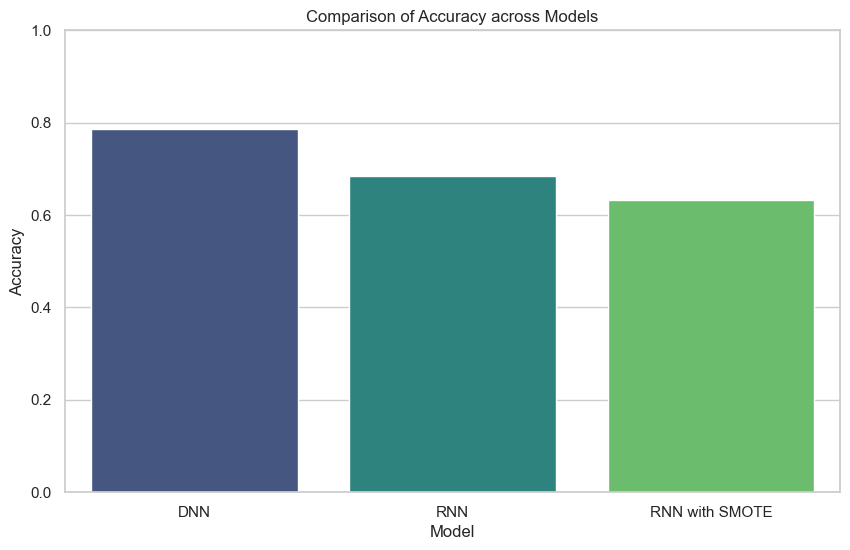

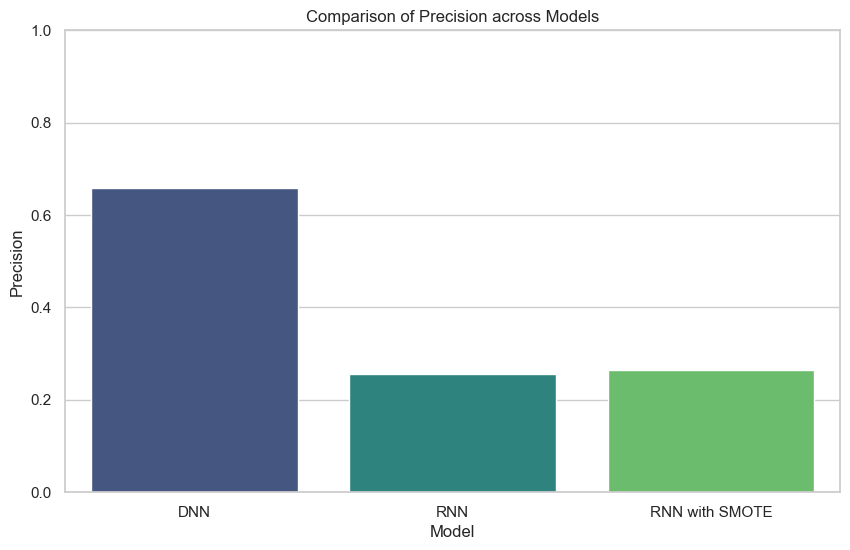

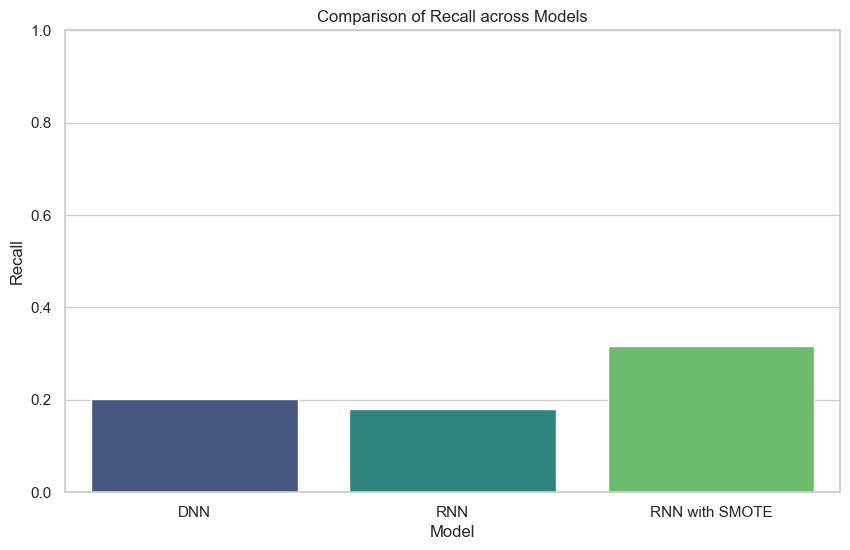

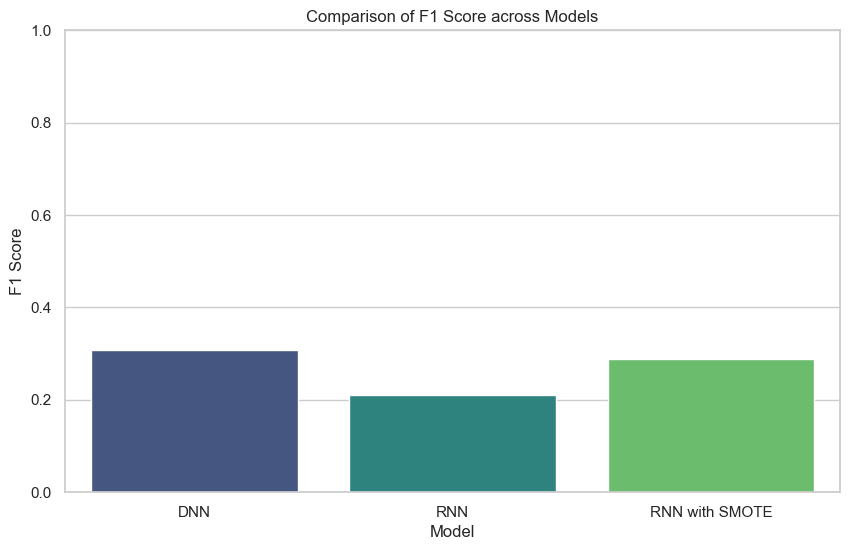

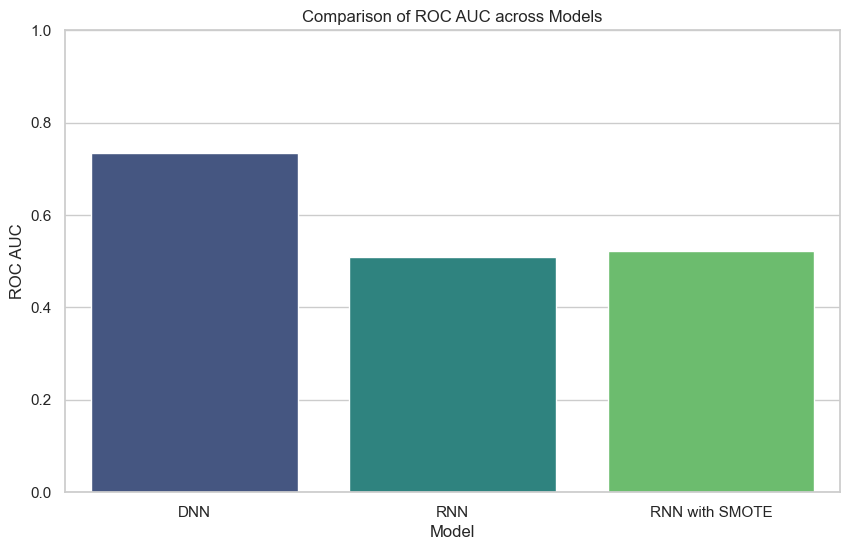

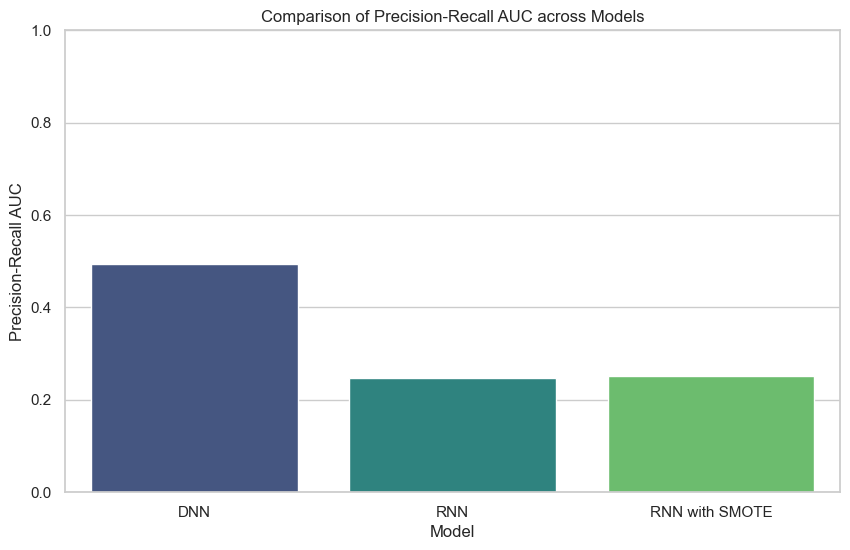

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Crear un DataFrame con los resultados
results = {
    'Model': ['DNN', 'RNN', 'RNN with SMOTE'],
    'Accuracy': [0.7867, 0.6835, 0.6324],
    'Precision': [0.6578, 0.2567, 0.2655],
    'Recall': [0.2009, 0.1798, 0.3155],
    'F1 Score': [0.3078, 0.2115, 0.2884],
    'ROC AUC': [0.7344, 0.5095, 0.5229],
    'Precision-Recall AUC': [0.4945, 0.2483, 0.2527]
}

df_results = pd.DataFrame(results)

# Configurar estilo de seaborn
sns.set(style="whitegrid")

# Función para crear los gráficos
def plot_metric(metric):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Model', y=metric, data=df_results, palette='viridis')
    plt.title(f'Comparison of {metric} across Models')
    plt.ylabel(metric)
    plt.xlabel('Model')
    plt.ylim(0, 1)
    plt.show()

# Crear gráficos para cada métrica
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC', 'Precision-Recall AUC']
for metric in metrics:
    plot_metric(metric)


* DNN Model:

Accuracy: 0.7867
Precision: 0.6578
Recall: 0.2009
F1 Score: 0.3078
ROC AUC: 0.7344
Precision-Recall AUC: 0.4945

* RNN Model:

Accuracy: 0.6835
Precision: 0.2567
Recall: 0.1798
F1 Score: 0.2115
ROC AUC: 0.5095
Precision-Recall AUC: 0.2483

* RNN Model with SMOTE:

Accuracy: 0.6324
Precision: 0.2655
Recall: 0.3155
F1 Score: 0.2884
ROC AUC: 0.5229
Precision-Recall AUC: 0.2527

#### Conclusión
#### DNN Model:

Ventajas:
Mayor precisión (0.6578), lo que indica que cuando predice una instancia como positiva, tiene más probabilidades de ser correcta en comparación con los otros modelos.
Mayor accuracy (0.7867), sugiriendo que en general hace más predicciones correctas.
Mayor ROC AUC (0.7344), lo que indica una mejor capacidad para distinguir entre clases positivas y negativas.
Mayor Precision-Recall AUC (0.4945), lo que sugiere un mejor rendimiento en situaciones de datos desequilibrados.
Desventajas:
Menor recall (0.2009), indicando que identifica menos positivos verdaderos en comparación con el modelo RNN con SMOTE.

#### RNN Model:

Ventajas:
No tiene ventajas claras sobre los otros modelos en las métricas evaluadas.
Desventajas:
Menor rendimiento general en todas las métricas en comparación con el modelo DNN.

#### RNN Model with SMOTE:

Ventajas:
Mayor recall (0.3155), lo que indica que identifica más positivos verdaderos en comparación con los otros modelos.
Desventajas:
Menor precisión (0.2655), lo que indica que sus predicciones positivas son menos confiables.
Menor accuracy (0.6324), menor F1 Score (0.2884), menor ROC AUC (0.5229) y menor Precision-Recall AUC (0.2527) en comparación con el modelo DNN.

#### Mejor Modelo
El modelo DNN es el mejor de los tres en general. Aunque su recall es menor, su precisión, accuracy, ROC AUC, y Precision-Recall AUC son significativamente mejores. Esto sugiere que el modelo DNN es más confiable y tiene un mejor rendimiento general, especialmente en un contexto donde la distinción clara entre clases y la precisión de las predicciones positivas son cruciales. El modelo RNN con SMote tiene un mejor recall, lo cual puede ser útil en situaciones donde es crucial detectar la mayor cantidad posible de positivos, pero en general, el DNN ofrece un mejor equilibrio entre precisión y capacidad de discriminación.

### 7. Análisis de Relevancia
#### Relevancia de la Solución Desarrollada

La implementación de modelos predictivos como DNN, RNN, y RNN con SMOTE ha permitido analizar y clasificar los datos de manera efectiva, destacando patrones y comportamientos que pueden ser críticos para la toma de decisiones. 

La solución desarrollada es relevante porque:

* Detección de Anomalías:

Los modelos, especialmente el DNN, muestran una alta precisión y capacidad para distinguir entre clases positivas y negativas. Esto es esencial para detectar anomalías o eventos inusuales en los datos, lo que puede ser vital en contextos como la detección de fraudes, fallos en sistemas, o comportamiento anómalo de clientes.

* Manejo del Desbalanceo de Clases:

La aplicación de SMOTE ha sido clave para manejar el desbalance de clases en los datos, mejorando la capacidad del modelo para identificar casos de la clase minoritaria. Esto asegura que el modelo no esté sesgado hacia la clase mayoritaria, proporcionando una evaluación más equilibrada y justa.
Aportes Generados

* Mejor Capacidad Predictiva:

La implementación del modelo DNN ha demostrado una alta capacidad predictiva con una precisión y una área bajo la curva ROC significativas. Esto sugiere que el modelo es robusto y puede ser utilizado para predicciones confiables en escenarios reales.

* Análisis de Comportamiento:

Los resultados obtenidos permiten una mejor comprensión del comportamiento de los datos, identificando patrones que pueden ser utilizados para desarrollar estrategias más informadas y efectivas.
Herramientas para la Toma de Decisiones:

Los modelos proporcionan una herramienta valiosa para la toma de decisiones, ofreciendo insights basados en datos que pueden guiar políticas y acciones específicas para mejorar la eficiencia y eficacia de las operaciones.

#### Posibles Limitaciones

* Complejidad Computacional:

El entrenamiento de modelos complejos como LSTM y DNN puede ser computacionalmente costoso y requerir recursos significativos en términos de tiempo y capacidad de procesamiento.

* Overfitting:

Existe el riesgo de overfitting, especialmente con modelos complejos y conjuntos de datos grandes. Aunque se han implementado técnicas como el Dropout y la validación cruzada, siempre existe la posibilidad de que los modelos se ajusten demasiado a los datos de entrenamiento.

* Datos Imbalanceados:

A pesar del uso de SMOTE, el desbalance de clases sigue siendo un desafío. La generación sintética de datos puede introducir ruido y no siempre refleja con precisión la distribución de los datos reales.

#### Análisis y Estudios Posteriores

* Enriquecimiento de Datos:

Incorporar más datos o características adicionales podría ayudar a mejorar la precisión y la capacidad predictiva de los modelos. El análisis de la relevancia de las características puede identificar qué datos adicionales serían más útiles.

* Implementación en Tiempo Real:

Desarrollar sistemas para la implementación en tiempo real de los modelos predictivos puede ser un área de estudio interesante, permitiendo la detección y respuesta instantánea a eventos anómalos o críticos.

* Análisis de Interpretabilidad:

Realizar estudios para mejorar la interpretabilidad de los modelos, utilizando técnicas como LIME o SHAP, para entender mejor cómo y por qué los modelos toman ciertas decisiones.

En resumen, la solución desarrollada demuestra ser relevante y aporta valor significativo en términos de capacidad predictiva y manejo de datos desbalanceados.

In [ ]:
# ultimo intento LSTM, versión simplificada

In [175]:
def build_simple_lstm_model(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(LSTM(50, activation='relu'))  # Una sola capa LSTM
    model.add(Dense(1, activation='sigmoid'))  # Sin Dropout para simplificación
    
    optimizer = Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

input_shape = (X_train_res.shape[1], X_train_res.shape[2])
simple_lstm_model = build_simple_lstm_model(input_shape)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = simple_lstm_model.fit(X_train_res, y_train_res, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluación del modelo LSTM simplificado
print("\nEvaluación del modelo LSTM simplificado:")
evaluate_model(simple_lstm_model, X_test_rnn, y_test)

input_shape = (X_train_res.shape[1], X_train_res.shape[2])
simple_lstm_model = build_simple_lstm_model(input_shape)

Epoch 1/20
2484/2484 ━━━━━━━━━━━━━━━━━━━━ 259s 104ms/step - accuracy: 0.6172 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 2/20
2484/2484 ━━━━━━━━━━━━━━━━━━━━ 259s 104ms/step - accuracy: 0.6234 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 3/20
  45/2484 ━━━━━━━━━━━━━━━━━━━━ 3:57 97ms/step - accuracy: 0.6265 - loss: nan

KeyboardInterrupt: 